### Utilities for finding examples of unsatisfiable $\Sigma_2^P$-SAT instances and their unstabilizable graphs:

In this jupyter notebook one can test graphs for their max clique. This may also implement the reduction from $\Sigma_2^P$-SAT to $\omega$-VCS.

The first implementation demonstrates a way on how to calculate omega(G) and also list the max cliques.

In [191]:
from colorama import Fore
from colorama import Style

TEXT_SUCCESSFUL = "{}succesful{}!".format(Fore.GREEN, Style.RESET_ALL)

def test_failed(output):
    return "{}{}{}!".format(Fore.RED, output, Style.RESET_ALL)

def test_multiple(func,tests):
    for entry in tests:
        value = entry[0]
        expected = entry[1]
        actual = func(*value) 
        if actual == expected:
            print("Test [{}] {}".format(str(value), TEXT_SUCCESSFUL))
        else:
            print(test_failed("Test [{}] failed! Expected {} but calculated {} ...".format(str(value),expected,actual)))
            break
    else:
        print("All tests successful!")
        
def test(func,test,name):
    value = test[0]
    expected = test[1]
    actual = func(value) 
    if actual == expected:
        print("Test [{}] {}".format(name, TEXT_SUCCESSFUL))
    else:
        print(test_failed("Test [{}] failed! Expected {} but calculated {} ...".format(name,expected,actual)))
        return
    
def test_instance_method(instance_method_call, expected, name):
    actual = instance_method_call
    if actual == expected:
        print("Test [{}] {}".format(str(name), TEXT_SUCCESSFUL))
    else:
        print(test_failed("Test [{}] failed! Expected {} but calculated {} ...".format(str(name),expected,actual)))
        return

amount of max cliques =  42
omega(G) =  5
clique [1, 4, 13, 8, 10] is disjunctive to [3, 11, 5, 9, 15]
5-omega-stable: True


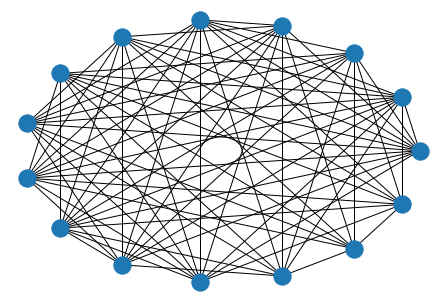

In [192]:
import networkx as nx

def main():
    G = nx.Graph()
    #G with omega(G) = 3
    #G.add_edges_from([(1,3), (1,4), (1,5), (1,7), (2,3), (2,5), (2,6), (2,8), (3,7), (3,5), (4,8), (4,7), (4,6), (5,8), (6,7), (6,8)])
    G.add_edges_from([(1,4), (1,5), (1,6), (1,7), (1,8), (1,9), (1,10), (1,11), (1,12), (1,13), (1,14), (2,4), (2,5), (2,6), (2,7), (2,9), (2,12), (2,10), (2,13), (2,15), (3,4), (3,5), (3,7), (3,8), (3,9), (3,11), (3,12), (3,14), (3,15), (4,1), (4,2), (4,3), (4,7), (4,8), (4,9), (4,10), (4,11), (4,12), (4,13), (4,14), (5,1), (5,2), (5,3), (5,7), (5,9), (5,10), (5,12), (5,13), (5,15), (6,1), (6,2), (6,7), (6,8), (6,10), (6,11), (6,12), (6,13), (6,14), (6,15), (7,1), (7,2), (7,3), (7,4), (7,5), (7,6), (7,12), (7,11), (7,10), (7,13), (7,14), (8,1), (8,3), (8,4), (8,6), (8,12), (8,11), (8,10), (8,13), (8,14), (8,15), (9,1), (9,2), (9,3), (9,4), (9,5), (9,11), (9,12), (9,14), (9,15), (10, 1), (10,2), (10,4), (10,5), (10,7), (10,8), (10,6), (10,13), (10,14), (10,15), (11,1), (11,3), (11,4), (11,5), (11,7), (11,8), (11,9), (11,13), (11,14), (11,5), (12,1), (12,2), (12,3), (12,4), (12,5), (12,6), (12,7), (12,8), (12,9), (13,1), (13,2), (13,4), (13,5), (13,6), (13,7), (13,8), (13,10), (13,11), (13,12), (14,1), (14,3), (14,4), (14,6), (14,7), (14,8), (14,9), (14,10), (14,11), (14,12), (15,2), (15,3), (15,5), (15,6), (15,8), (15,9), (15,10), (15,11)])
    nx.draw(G, pos=nx.circular_layout(G))
    analyze_graph(G)

# method to analyze all relevant aspects of the graph G
def analyze_graph(G):
    #print("max_cliques: ", reformat_cliques(nx.find_cliques(G)))
    print("amount of max cliques = ", len(list(filter(lambda clique: clique[1] == omega(G), reformat_cliques(nx.find_cliques(G))))))
    print("omega(G) = ", omega(G))
    print("{}-omega-stable: {}".format(omega(G), is_stable(G)))
    return omega(G)

# print all max cliques in the graph G in a pretty format
def reformat_cliques(cliques):
    return list(map(lambda clique: tuple([clique, len(clique)]), cliques))

# return the value of the graph number omega in the graph G
def omega(G):
    return max(map(lambda clique: len(clique), nx.find_cliques(G)) or 0)

# if this method returns True, it is a real result. A False return value can be wrong.
def is_stable(G):
    for clique in nx.find_cliques(G):
        for another_clique in nx.find_cliques(G):
            if (is_disjunctive(clique, another_clique) and len(clique) == len(another_clique)):
                print("clique {} is disjunctive to {}".format(clique, another_clique))
                return True
    # TODO: implement logic to test for changes in omega after removing vertices
    return False                 

# check for 2 cliques, if all vertices are disjunctive
def is_disjunctive(clique1, clique2):
    return len(set(clique1) & set(clique2)) == 0

if __name__ == '__main__':
    main()

In [193]:
# test is_disjunctive
test_multiple(is_disjunctive, [
        (([1,2,3], [4,5,6]), True),
        (([1,2,3], [4,5,3]), False)
        ])
# test omega
test_graph = nx.Graph()
test_graph.add_edges_from([(1,3), (1,4), (1,5), (1,7), (2,3), (2,5), (2,6), (2,8), (3,7), (3,5), (4,8), (4,7), (4,6), (5,8), (6,7), (6,8)])
test(omega, (test_graph, 3), "omega is calculated correctly")

# test is_stable
stable_graph = nx.Graph()
stable_graph.add_edges_from([(1,2), (2,3), (3,4)])
test(is_stable, (stable_graph, True), "stable graph is stable")
unstable_graph = nx.Graph()
unstable_graph.add_edges_from([(1,2), (2,3)])
test(is_stable, (unstable_graph, False), "unstable graph is unstable")

Test [([1, 2, 3], [4, 5, 6])] succesful!
Test [([1, 2, 3], [4, 5, 3])] succesful!
All tests successful!
Test [omega is calculated correctly] succesful!
clique [2, 1] is disjunctive to [4, 3]
Test [stable graph is stable] succesful!
Test [unstable graph is unstable] succesful!


### Implementation of the reduction $\Sigma_2$-SAT $\leq^P_m \omega$-VCS:

For the implementation of the reduction it is necessary to first implement the instance of $\Sigma_2$-SAT

In [194]:
import ttg

class truth_table_entry:
    
    def __init__(self, variable_assignments, truth_value):
        self.__variable_assignments = variable_assignments
        self.__truth_value = truth_value
        
    def get_variable_assignments(self):
        return self.__variable_assignments
    
    def truth_value(self):
        return self.__truth_value
        
    def __str__(self):
        return str(self.__variable_assignments) + ", " + str(self.__truth_value)
    
    def __repr__(self):
        return self.__str__().join(['<', '>'])
        
    def is_satisfied(self):
        return self.__truth_value > 0

class sigma2:
    
    def __init__(self,existential_quantified_variables, forall_quantified_variables, boolean_formula):
        self.__existential_quantified_variables = existential_quantified_variables
        self.__forall_quantified_variables = forall_quantified_variables
        self.__boolean_formula = boolean_formula
        self.__truth_table = ttg.Truths(self.__existential_quantified_variables + self.__forall_quantified_variables, [self.__boolean_formula], True, True)
        self.__truth_table_as_objects = self.construct_truth_table()
        #self.print_object_truth_table()
        
    def boolean_formula_is_satisfiable(self):
        return len(list(filter(lambda entry: entry.is_satisfied(), list(self.get_raw_object_truth_table())))) > 0
        
    def to_cnf(self):
        cnf_clauses = list()
        
        for assignment in list(map(lambda assignment: assignment.get_variable_assignments(), self.get_all_unsatisfiable_assignments())):
            flipped_assignment = list(map(lambda entry: 1 if entry == 0 else 0, assignment))
            clause = list()
            for variable_index in range(len(self.__existential_quantified_variables + self.__forall_quantified_variables)):
                # test if flipped == 1 or flipped == 0 has to be checked, originally it was flipped == 0 !
                clause.append((list(self.__existential_quantified_variables + self.__forall_quantified_variables)[variable_index] if flipped_assignment[variable_index] == 1 else "not({})".format(list(self.__existential_quantified_variables + self.__forall_quantified_variables)[variable_index])))
            cnf_clauses.append((" or ".join(clause)).join(["(", ")"]))

        return " and ".join(cnf_clauses)
                
            
    def get_raw_object_truth_table(self):
        return self.__truth_table_as_objects
    
    def print_object_truth_table(self):
        print(str(self.__existential_quantified_variables + self.__forall_quantified_variables).replace('[', '').replace(']', '').replace('\'', '') + ', F\n' + '\n'.join(list(map(lambda entry: str(entry), self.__truth_table_as_objects))).replace('[', '').replace(']', ''))
        
    def get_all_unsatisfiable_assignments(self):
        return list(filter(lambda assignment: not assignment.is_satisfied(), self.__truth_table_as_objects))
    
    def construct_truth_table(self):
        return map(lambda entry: truth_table_entry(entry[:(len(self.__existential_quantified_variables) + len(self.__forall_quantified_variables))], entry[-1:][0]), self.get_truth_table_as_integer_arrays())
        
    def get_existential_quantified_variables(self):
        return self.__existential_quantified_variables
    
    def get_forall_quantified_variables(self):
        return self.__forall_quantified_variables
    
    def get_boolean_formula(self):
        return self.__boolean_formula
    
    def get_truth_table(self):
        return self.__truth_table
    
    def get_truth_table_as_integer_arrays(self):
        return list(map(lambda entry: [int(character) for character in entry.replace('|', '').replace(' ', '')], str(self.get_truth_table()).split("\n")[3:-1]))
    
    def __str__(self):
        return "Sigma2[\n\texistentially quantified variables: {},\n\tforall quantified variables: {},\n\tboolean formula: {}\n]".format(self.__existential_quantified_variables, self.__forall_quantified_variables, self.__boolean_formula)

## Tests for the class sigma2:

The following code can be executed to run tests for the class sigma2

In [195]:
# Tests for sigma2:
F1 = sigma2(['x'], ['y'], "x and not(x)")
test_instance_method(F1.boolean_formula_is_satisfiable(), False, "x and not(x) is not satisfiable")

F2 = sigma2(['x'], ['y'], "x and y")
test_instance_method(F2.boolean_formula_is_satisfiable(), True, "x and not(x) is satisfiable")

F3 = sigma2(['x'], ['y'], "x or y")
test_instance_method(F3.to_cnf(), "(x or y)", "(x or y) to CNF")

F4 = sigma2(['x'], ['y'], "x and y")
test_instance_method(F4.to_cnf(), "(x or y) and (x or not(y)) and (not(x) or y)", "(x and y) to CNF")


Test [x and not(x) is not satisfiable] succesful!
Test [x and not(x) is satisfiable] succesful!
Test [(x or y) to CNF] succesful!
Test [(x and y) to CNF] succesful!


The next step of the implementation of the reduction of $\Sigma_2$-SAT to $m-\omega$-VCS is the encoding of the CNF into a graph. Therefore several steps are required:

* [x] 1. Split each clause into its variables
* [x] 2. Create a map which maps each variable to a specific value, for example:
* [x] * a=1, not(a)=-1, b=2, not(b)=-2
* [x] 3. Add all variables from all clauses to the graph
* [x] 4. Create a color map which gives all variables from a clause the same color
* [ ] 5.1 Iterate over all clauses:
* [ ] * 5.2 For each variable $v$ of a clause, add all edges to the variables $v'$ with $v \neq not(v')$ of all other clauses

### 1. Split each clause into its variables

In [196]:
# split clauses
def split_clause(clause):
    return str(clause).split(" or ")
    
# test split_clause
test(split_clause, ("a or b", ['a', 'b']), "split clause")

# map a CNF to a split of its clauses:
CNF = "(x or y) and (x or not(y)) and (not(x) or y)"

def split_cnf_into_clauses(cnf):
    return str(cnf).split(" and ")

split_cnf_into_clauses(CNF)
test(split_cnf_into_clauses, (CNF, ['(x or y)', '(x or not(y))', '(not(x) or y)']), "split a CNF into its clauses")

# a deconstructed CNF is without any remaining brackets and each "not" being replaced by a simple "-".
def deconstruct_cnf(cnf):
    return list(map(lambda clause: split_clause(clause), split_cnf_into_clauses(cnf.replace("(", '').replace(")", '').replace("not", '-'))))

# This test shows, what the result of the deconstruction will look like
test(deconstruct_cnf, (CNF, [['x', 'y'], ['x', '-y'], ['-x', 'y']]), "deconstruction of a CNF")

Test [split clause] succesful!
Test [split a CNF into its clauses] succesful!
Test [deconstruction of a CNF] succesful!


### 2. Create a map which maps each variable to a specific value:

Example: a=1, not(a)=-1, b=2, not(b)=-2

At this point we will now start by using an instance of $\Sigma_2$-SAT, so we construct one in python:

In [197]:
sigma2_instance = sigma2(['x'], ['y', 'z'], "x and not(y) and y and z")

def get_all_variables(sigma2):
    return sigma2.get_existential_quantified_variables() + sigma2.get_forall_quantified_variables()

test(get_all_variables, (sigma2_instance, ['x', 'y', 'z']), "get all variables")

# now we do need a loop which iterates through the deconstructed CNF and maps each variable to a value:
def map_variables_to_integers(sigma2):
    variables = get_all_variables(sigma2)
    result = sigma2.get_boolean_formula()
    for index in range(len(variables)):
        result = result.replace(variables[index], str(index))
        
    return result

mapped_cnf = map_variables_to_integers(sigma2_instance)
test(map_variables_to_integers, (sigma2_instance, "0 and not(1) and 1 and 2"), "map_variables_to_integers")

def transform_sigma2_into_vertex_clusters(sigma2_):
    return deconstruct_cnf(map_variables_to_integers(sigma2(sigma2_.get_existential_quantified_variables(), sigma2_.get_forall_quantified_variables(), sigma2_.to_cnf()))) 

test(
    transform_sigma2_into_vertex_clusters, 
    (sigma2_instance, 
     [
        ['0', '1', '2'],
        ['0', '1', '-2'],
        ['0', '-1', '2'],
        ['0', '-1', '-2'],
        ['-0', '1', '2'],
        ['-0', '1', '-2'],
        ['-0', '-1', '2'],
        ['-0', '-1', '-2']
    ]),
    "transform_sigma2_into_vertex_clusters"
)

Test [get all variables] succesful!
Test [map_variables_to_integers] succesful!
Test [transform_sigma2_into_vertex_clusters] succesful!


## 3. Add all variables from all clauses to the graph:



Test [get_all_node_values] succesful!
Test [is_inverted_node for True return value] succesful!
Test [is_inverted_node for False return value] succesful!
Test [is_inverted_node for True return value and 0 and -0 as values] succesful!


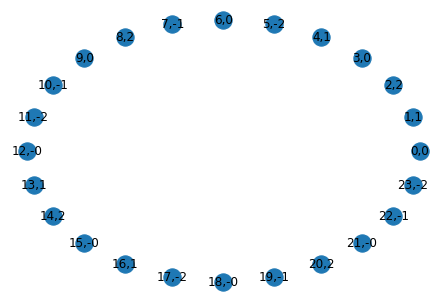

In [198]:
import itertools

sigma2_instance = sigma2(['x'], ['y', 'z'], "x and not(y) and y and z")

def flatten(collection):
    return list(itertools.chain.from_iterable(collection))

def construct_graph_from_sigma2(sigma2_):
    # get all vertex clusters from a sigma2 instance
    vertex_clusters = transform_sigma2_into_vertex_clusters(sigma2_)
    
    # intialize a graph
    G_F = nx.Graph()
    
    # iterate through all vertex clusters and for each vertex cluster add all vertices to the graph G.
    for index in range(len(flatten(vertex_clusters))):
        G_F.add_node("{},{}".format(index, flatten(vertex_clusters)[index]))
        
    return G_F, vertex_clusters

def get_node_value(index, G_F):
      return list(G_F.nodes())[index].split(",")[1]
  
def get_all_node_values(G_F):
      return list(map(lambda node: get_node_value(node, G_F), range(len(G_F.nodes()))))
  
def is_inverted_node(index1, index2, graph):
    # catch the special case where "0" and "-0" are equal after parsing
    # thus the sum of two integers a and b is always equal to 0 <=> b = -a
    # and if b != -a it is a + b != 0
    return int(get_node_value(index1, graph)) + int(get_node_value(index2, graph)) == 0
      
G_F = construct_graph_from_sigma2(sigma2_instance)[0] 

# draw the result of the construction
nx.draw(G_F, pos=nx.circular_layout(G_F), with_labels=True)

# test helper methods

test(get_all_node_values, (G_F, ['0',
 '1',
 '2',
 '0',
 '1',
 '-2',
 '0',
 '-1',
 '2',
 '0',
 '-1',
 '-2',
 '-0',
 '1',
 '2',
 '-0',
 '1',
 '-2',
 '-0',
 '-1',
 '2',
 '-0',
 '-1',
 '-2']), "get_all_node_values") 

# helper method to execute the test for is_inverted_node
def execute_is_inverted_node_for_test(arg):
    return is_inverted_node(0, 1, test_graph)

test_graph = nx.Graph()
test_graph.add_node("0,1")
test_graph.add_node("1,-1")

test(execute_is_inverted_node_for_test, (None, True), "is_inverted_node for True return value")

test_graph2 = nx.Graph()
test_graph2.add_node("0,1")
test_graph2.add_node("1,1")

# helper method to execute the test for is_inverted_node
def execute_is_inverted_node_for_test2(arg):
    return is_inverted_node(0, 1, test_graph2)

# (*1) here one has to be cautious because "0" and "-0" are equal after parsing as integer
test(execute_is_inverted_node_for_test2, (None, False), "is_inverted_node for False return value")

# to also test with respect to (*1) the following scenario is required:
test_graph3 = nx.Graph()
test_graph3.add_node("0,0")
test_graph3.add_node("0,-0")

# helper method to execute the test for is_inverted_node
def execute_is_inverted_node_for_test3(arg):
    return is_inverted_node(0, 1, test_graph3)

test(execute_is_inverted_node_for_test3, (None, True), "is_inverted_node for True return value and 0 and -0 as values")


##  4. Create a color map which gives all variables from a clause the same color:

The following code snipped will first contain a method which can be used to calculate random colors. The rest of this code snippet then creates a color map which gives all variables from a clause the same color.

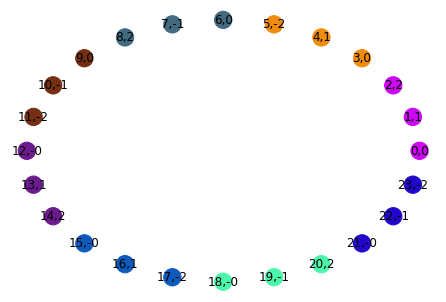

In [199]:
import random

# generates a random color in hex
def get_random_color():
    chars = '0123456789ABCDEF'
    return '#'+''.join(random.sample(chars,6))

sigma2_instance = sigma2(['x'], ['y', 'z'], "x and not(y) and y and z")

def generate_color_map(sigma2_, clusters):
    color_map = []
    for cluster in range(clusters):
        color = get_random_color()
        for variable in range(len(sigma2_.get_existential_quantified_variables() + sigma2_.get_forall_quantified_variables())):
            color_map.append(color)
            
    return color_map

def draw_graph_with_color_map(graph, color_map):
    nx.draw(graph, pos=nx.circular_layout(graph), with_labels=True, node_color=color_map)
        
graph, clusters = construct_graph_from_sigma2(sigma2_instance)
draw_graph_with_color_map(graph, generate_color_map(sigma2_instance, len(clusters)))

In [200]:
# Tests for color map
sigma2_instance = sigma2(['x'], ['y', 'z'], "x and not(y) and y and z")
graph, clusters = construct_graph_from_sigma2(sigma2_instance)
color_map = generate_color_map(sigma2_instance, len(clusters))

NUMBER_OF_VARIABLES = len(sigma2_instance.get_existential_quantified_variables() + sigma2_instance.get_forall_quantified_variables())
COLOR_MAP_EXPECTED_LENGTH = len(clusters)*NUMBER_OF_VARIABLES


def test_color_map_number_of_different_colors(arg):
    return len(set(color_map))

test(test_color_map_number_of_different_colors, (None, len(clusters)), "color map number of different colors")


def test_color_map_length(arg):
    return len(color_map)

test(test_color_map_length, (None, COLOR_MAP_EXPECTED_LENGTH), "color map length")

def test_each_color_has_some_amount_of_occurrences(arg):
    # this will map each entry to the amount of occurrences of the color which this entry represents
    histogram = list(map(lambda color: len(list(filter(lambda another_color: color == another_color, color_map))), color_map))
    
    # filter all values which are not equal to the amount of variables of the sigma2 instance
    return list(filter(lambda frequency: frequency == NUMBER_OF_VARIABLES, histogram))

test(test_each_color_has_some_amount_of_occurrences, (None, [3 for _ in range(COLOR_MAP_EXPECTED_LENGTH)]), "each color has the some amount of occurrences")

Test [color map number of different colors] succesful!
Test [color map length] succesful!
Test [each color has the some amount of occurrences] succesful!


## 5. Add edges between the vertices:

The edges now have to be added using the following pattern: Iterate over all vertex-clusters. For each vertex u in a vertex-cluster, iterate over all other vertex-cluster and for each other vertex-cluster, iterate over all vertices v inside of this specific vertex-cluster and add the edge {u,v} if and only if u != not(v). This means draw an edge between u and v if u is not the inversion of v.

 [['0', '1', '2'], ['0', '1', '-2'], ['0', '-1', '2'], ['0', '-1', '-2'], ['-0', '1', '2'], ['-0', '1', '-2'], ['-0', '-1', '2'], ['-0', '-1', '-2']]
24
amount of max cliques =  32
omega(G) =  7
clique ['19,-1', '21,-0', '11,-2', '5,-2', '17,-2', '7,-1'] is disjunctive to ['18,-0', '22,-1', '10,-1', '8,2', '14,2', '2,2']
7-omega-stable: True
Test [constructed edges form max clique of size 7] succesful!


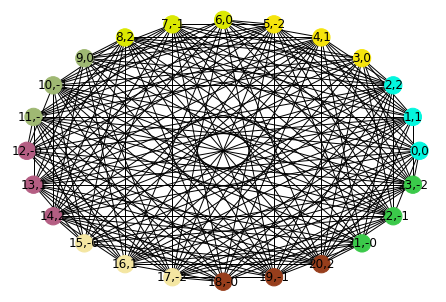

In [201]:
sigma2_instance = sigma2(['x'], ['y', 'z'], "x and not(y) and y and z")
graph, clusters = construct_graph_from_sigma2(sigma2_instance)

print(graph, clusters)
print(len(graph.nodes()))

def construct_edges(G_F, clusters):
    
    if len(clusters) == 0:
        return G_F
    
    # amount of variables in G_F = amount of variables per cluster
    amount_of_variables = len(clusters[0])
    # iterate over all clusters
    for cluster_index in range(len(clusters)):
        # for each cluster iterate over all vertices
        for vertex_index in range(amount_of_variables):
            # for each of those vertices again iterate over all clusters except the current cluster
            for another_cluster_index in range(len(clusters)):
                if(another_cluster_index == cluster_index):
                    continue
                else:
                    # iterate over all vertices in the other cluster
                    for another_vertex_index in range(amount_of_variables):
                        if not is_inverted_node(cluster_index*amount_of_variables + vertex_index, another_cluster_index*amount_of_variables + another_vertex_index, G_F):
                            first_vertex = list(G_F.nodes())[cluster_index*amount_of_variables + vertex_index]
                            second_vertex = list(G_F.nodes())[another_cluster_index*amount_of_variables + another_vertex_index]
                            G_F.add_edge(first_vertex, second_vertex)        
    return G_F

G_F = construct_edges(graph, clusters)

draw_graph_with_color_map(G_F, generate_color_map(sigma2_instance, len(clusters)))

# test "construct_edges"
sigma2_instance = sigma2(['x'], ['y', 'z'], "x and not(y) and y and z")
graph, clusters = construct_graph_from_sigma2(sigma2_instance)

def execute_construct_edges(arg):
    return construct_edges(graph, clusters)

resulting_graph = execute_construct_edges(None)
    
test(analyze_graph, (resulting_graph, 7), "constructed edges form max clique of size 7")

After implementing (5) one can see that the constructed graph G_F definitely ha omega(G_F) = 7 < 8 as argumented in the proof for 3.2.2. What is still missing here is the fact that the "conflicting clauses" are still present in the CNF F and thatswhy also in the graph G_F. The next step to implement the reduction will be to implement the removal of "conflicting clauses" from F. What we also want to do here is to implement a method which is capable of running the complete construction of the graph G_F as done in (5).

amount of max cliques =  32
omega(G) =  7
clique ['19,-1', '21,-0', '11,-2', '5,-2', '17,-2', '7,-1'] is disjunctive to ['18,-0', '22,-1', '10,-1', '8,2', '14,2', '2,2']
7-omega-stable: True
Test [sigma2_instance is not satisfiable] succesful!
amount of max cliques =  2
omega(G) =  1
clique ['1,1'] is disjunctive to ['0,0']
1-omega-stable: True
Test [satisfiable_sigma2_instance is satisfiable] succesful!


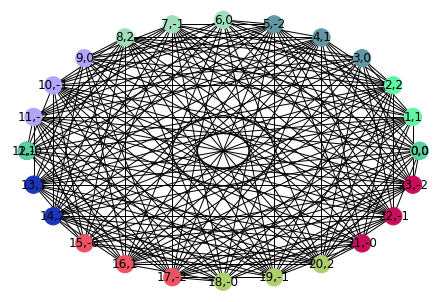

In [202]:
sigma2_instance = sigma2(['x'], ['y', 'z'], "x and not(y) and y and z")

def reduce_to_m_omega_VCS(sigma2_instance):
    # first step is to obtain the graph G_F with the vertex-clusters
    G_F, clusters = construct_graph_from_sigma2(sigma2_instance)
    # then construct the edges
    G_F = construct_edges(G_F, clusters)
    # draw the graph
    draw_graph_with_color_map(G_F, generate_color_map(sigma2_instance, len(clusters)))
    omega_G_F = analyze_graph(G_F)
    if omega_G_F == len(clusters):
        return "satisfiable"
    else:
        return "not satisfiable"
    
    
# We know that sigma2_instance is not satisfiable, so we can test if the result of the reduction also is 'not satisfiable'
test(reduce_to_m_omega_VCS, (sigma2_instance, "not satisfiable"), "sigma2_instance is not satisfiable")

satisfiable_sigma2_instance = sigma2(['x'], ['y'], "x or y")

# We know that satisfiable_sigma2_instance is satisfiable, so we can test if the result of the reduction also is 'satisfiable'
test(reduce_to_m_omega_VCS, (satisfiable_sigma2_instance, "satisfiable"), "satisfiable_sigma2_instance is satisfiable")

As we know this reduction is currently only working, because we did not integrate the quantifiers of the $\Sigma_2$-instances into the reduction. Thus the next step will be to implement logic which can detect and remove "conflicting clauses" from the CNF or better spoken from the list of clauses from a $\Sigma_2$-instance, so that we can then construct a graph G_F and a $k$ which were constructed with respect to the quantifiers of a $\Sigma_2$-instance $F$.

To implement the quantifiers into the given reduction, we could simply modify the method `transform_sigma2_into_vertex_clusters` to also remove vertex-clusters which were constructed from "conflicting clauses". At this point one first has to think about how conflicting clauses can be detected.

The method `transform_sigma2_into_vertex_clusters` returns a list of vertex-clusters. An example can be the following code snippet:

In [203]:
sigma2_instance = sigma2(['x'], ['y', 'z'], "x and not(y) and y and z")
transform_sigma2_into_vertex_clusters(sigma2_instance)

[['0', '1', '2'],
 ['0', '1', '-2'],
 ['0', '-1', '2'],
 ['0', '-1', '-2'],
 ['-0', '1', '2'],
 ['-0', '1', '-2'],
 ['-0', '-1', '2'],
 ['-0', '-1', '-2']]

It is easy to see that each vertex-cluster is represented by a list of length equal to the number of variables of a $\Sigma_2$-SAT instance. The first $|X|$ element of the lists are the corresponding entries of the variables from `get_existential_quantified_variables`, so to find conflicting clauses, we have to look at the rest of the entries of each list. This can be used to modify the method `transform_sigma2_into_vertex_clusters`, so that it finally filters out the conflicting clauses.

In [204]:
from copy import deepcopy

sigma2_instance = sigma2(['x'], ['y', 'z'], "x and not(y) and y and z")

# method used for mapping clauses to clauses without entries corresponding to the existential quantified variables
def clause_with_out_existential_quantified_variables(clause, sigma2_):
    return clause[len(sigma2_.get_existential_quantified_variables()):]

clause = ['0', '1', '-2']

def execute_method_for_test(arg):
    return clause_with_out_existential_quantified_variables(clause, sigma2_instance)

test(execute_method_for_test, (None, ['1', '-2']), "clause_with_out_existential_quantified_variables")

# Since sigma2_instance is an instance where H is unsatisfiable, all eight clauses are conflicting and will be removed.

def remove_conflicting_clauses(clauses, sigma2_):
    # collect all conflicting clauses in a list
    conflicting_clauses = []
    # list to store the result
    resulting_clauses = deepcopy(clauses)
    # iterate over all clauses in sigma2_
    for clause in clauses:
        # for each clause in sigma2 iterate over all clauses in sigma2
        for another_clause in clauses:
            if clause_with_out_existential_quantified_variables(clause, sigma2_) == clause_with_out_existential_quantified_variables(another_clause, sigma2_) and clause != another_clause:
                conflicting_clauses.append(clause)
                conflicting_clauses.append(another_clause)
                
    # remove duplicates from the conflicting clauses
    conflicting_clauses.sort()
    conflicting_clauses = list(conflicting_clauses for conflicting_clauses,_ in itertools.groupby(conflicting_clauses))

    # remove all conflicting clauses        
    for clause in conflicting_clauses:
        resulting_clauses.remove(clause)
        
    return resulting_clauses

# tests for remove_conflicting_clauses

def execute_method_for_test(arg):
    return remove_conflicting_clauses(transform_sigma2_into_vertex_clusters(sigma2_instance), sigma2_instance)   

test(execute_method_for_test, (None, []), "remove_conflicting_clauses for a sigma2_instance which should be empty")

# test for non-empty result for remove_conflicting_clauses

sigma2_instance = sigma2(['x'], ['y'], "x and y")

def execute_method_for_test(arg):
    return remove_conflicting_clauses(transform_sigma2_into_vertex_clusters(sigma2_instance), sigma2_instance) 

test(execute_method_for_test, (None, [['0', '-1']]), "remove_conflicting_clauses for a sigma2_instance with H(x,y)=x and y")

# test for no conflicting clauses

sigma2_instance = sigma2(['x'], ['y'], "x or y")

def execute_method_for_test(arg):
    return remove_conflicting_clauses(transform_sigma2_into_vertex_clusters(sigma2_instance), sigma2_instance)

test(execute_method_for_test, (None, [['0', '1']]), "remove_conflicting_clauses for a sigma2_instance with H(x,y)=x or y")

Test [clause_with_out_existential_quantified_variables] succesful!
Test [remove_conflicting_clauses for a sigma2_instance which should be empty] succesful!
Test [remove_conflicting_clauses for a sigma2_instance with H(x,y)=x and y] succesful!
Test [remove_conflicting_clauses for a sigma2_instance with H(x,y)=x or y] succesful!


Thus, the previous code block shows the implementation of a working method which is able to remove all conflicting clauses from a $\Sigma_2$-SAT instance. We now only need to integrate this method into the reduction.

Test [empty graphs are not satisfiable] succesful!
Test [k is 0 for NO-instances] succesful!
Test [k > 0 for YES-instances] succesful!
Test [k == omega(G_F) for YES-instances] succesful!


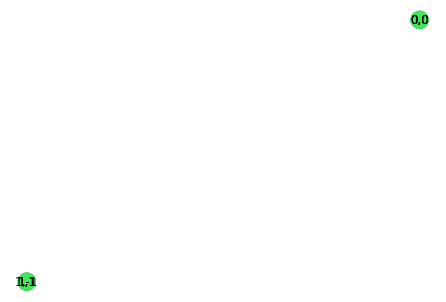

In [205]:
import math

# This extended implementation does also apply "remove_conflicting_clauses" to the result of "deconstruct_cnf"
def transform_sigma2_into_vertex_clusters(sigma2_):
    clauses = deconstruct_cnf(map_variables_to_integers(sigma2(sigma2_.get_existential_quantified_variables(), sigma2_.get_forall_quantified_variables(), sigma2_.to_cnf())))
    # ! make the method also return the original clauses, so we can determine the "k" which will be used for the decision of the vertex-cost of stability !
    return remove_conflicting_clauses(clauses, sigma2_), clauses

# Using this extended implementation, we can now also modify the way the reduction is executed. Hence, we will implement the complete logic of this reduction again in this code block, so that the extended implementation
# of "transform_sigma2_into_vertex_clusters" will also be used:

def construct_graph_from_sigma2(sigma2_):
    # get all vertex clusters from a sigma2 instance
    # ! now this call will use the extended implementation of "transform_sigma2_into_vertex_" !
    # Thus the clauses used in this reduction will no longer contain the conflicting clauses
    vertex_clusters, original_clusters = transform_sigma2_into_vertex_clusters(sigma2_) 
    
    # intialize a graph
    G_F = nx.Graph()
    
    # iterate through all vertex clusters and for each vertex cluster add all vertices to the graph G.
    for index in range(len(flatten(vertex_clusters))):
        G_F.add_node("{},{}".format(index, flatten(vertex_clusters)[index]))
        
    # ! also return the original clusters !
    return G_F, vertex_clusters, original_clusters

def construct_edges(G_F, clusters):
    # amount of variables in G_F = amount of variables per cluster
    amount_of_variables = len(clusters[0]) or 0
    # iterate over all clusters
    for cluster_index in range(len(clusters)):
        # for each cluster iterate over all vertices
        for vertex_index in range(amount_of_variables):
            # for each of those vertices again iterate over all clusters except the current cluster
            for another_cluster_index in range(len(clusters)):
                if(another_cluster_index == cluster_index):
                    continue
                else:
                    # iterate over all vertices in the other cluster
                    for another_vertex_index in range(amount_of_variables):
                        if not is_inverted_node(cluster_index*amount_of_variables + vertex_index, another_cluster_index*amount_of_variables + another_vertex_index, G_F):
                            first_vertex = list(G_F.nodes())[cluster_index*amount_of_variables + vertex_index]
                            second_vertex = list(G_F.nodes())[another_cluster_index*amount_of_variables + another_vertex_index]
                            G_F.add_edge(first_vertex, second_vertex)        
    return G_F

# Use the method "get_random_color" to produce a color-map which gives each vertex-cluster its own color, so that each vertex inside the cluster has the same color.
def generate_color_map(sigma2_, clusters):
    color_map = []
    for cluster in range(clusters):
        color = get_random_color()
        for variable in range(len(sigma2_.get_existential_quantified_variables() + sigma2_.get_forall_quantified_variables())):
            color_map.append(color)
            
    return color_map

# Utility to draw the graph by using the color_map
def draw_graph_with_color_map(graph, color_map):
    nx.draw(graph, pos=nx.circular_layout(graph), with_labels=True, node_color=color_map)


def reduce_to_m_omega_VCS(sigma2_instance):
    # first step is to obtain the graph G_F with the vertex-clusters
    G_F, clusters, original_clusters = construct_graph_from_sigma2(sigma2_instance)
    
    # ! factor used in the calculation k = math.floor(clauses(F') / clauses(F)) * omega(G_F) !
    k_factor = math.floor(len(clusters) / (len(original_clusters)or 1))
    
    
    
    # ! after removing the conflicting clauses "clusters" may be empty, thus we have to prevent a null pointer here !
    if len(clusters) == 0:
        nx.draw(G_F)
        return tuple([G_F, len(original_clusters), 0])
    
    # then construct the edges
    G_F = construct_edges(G_F, clusters)
    # draw the graph
    draw_graph_with_color_map(G_F, generate_color_map(sigma2_instance, len(clusters)))
    
    # determine omega(G_F) (here G_F is corresponding to G_F' from the proof 3.2.2, so the constructed graph after the removal of the conflicting clauses) 
    omega_G_F = omega(G_F)
    
    # determine k as described in the proof of Theorem 3.2.2
    k = k_factor * omega_G_F
    
    # return the resulting omega-VCS instance
    return tuple([G_F, len(original_clusters), k])

    # if omega(G_F) == original_clusters, this implies that omega(G_F) == clauses(F)
    #if omega_G_F == len(original_clusters):
    #    return "satisfiable"
    #else:
    #    return "not satisfiable"
    
sigma2_instance = sigma2(['x'], ['y', 'z'], "x and not(y) and y and z")
#sigma2_instance = sigma2(['x'], ['y'], "x and not(x)")
def execute_reduce_to_m_omega_VCS(arg):
    graph, m, k = reduce_to_m_omega_VCS(sigma2_instance)
    return graph.number_of_edges() > 0 and k == 0

test(execute_reduce_to_m_omega_VCS, (sigma2_instance, False), "empty graphs are not satisfiable")


# test for k=0 for NO-Instances
sigma2_instance = sigma2(['x'], ['y'], "x and y")

def execute_reduce_to_m_omega_VCS(arg):
    # return k
    return reduce_to_m_omega_VCS(sigma2_instance)[2]

test(execute_reduce_to_m_omega_VCS, (None, 0), "k is 0 for NO-instances")

# test for k>0 for YES-instances
sigma2_instance = sigma2(['x'], ['y'], "x or y")

def execute_reduce_to_m_omega_VCS(arg):
    k = reduce_to_m_omega_VCS(sigma2_instance)[2]
    return k > 0

test(execute_reduce_to_m_omega_VCS, (None, True), "k > 0 for YES-instances")

sigma2_instance = sigma2(['x'], ['y'], "x or y")

def execute_reduce_to_m_omega_VCS(arg):
    resulting_graph, m, k = reduce_to_m_omega_VCS(sigma2_instance)
    return k == omega(resulting_graph)

test(execute_reduce_to_m_omega_VCS, (None, True), "k == omega(G_F) for YES-instances")

The given code now implements the reduction including the quantifiers of the $\Sigma_2$-SAT instance $F$. For the last step we will have to change `reduce_to_m_omega_VCS` so it always returns a valid instance of $\Sigma_2$-SAT. Then the last step will be to implement a very simple class with some methods which is then able to decide the $m-\omega$-VCS instance.

In [206]:
class m_omega_vertex_cost_of_stability:
    
    def __init__(self, graph, m, k):
        self.__graph = graph
        self.__m = m
        self.__k = k
        
    def build_instance_from_reduction(sigma2_):
        graph, m, k = reduce_to_m_omega_VCS(sigma2_)
        return m_omega_vertex_cost_of_stability(graph, m, k)
    
    # 
    def is_satisfiable(self):
        # if the omega(graph) == m and graph is stable, then return True
        return self.__k > 0
    
    def __str__(self):
        return "<m_omega_vertex_cost_of_stability: graph, m={}, k={}>".format(self.__m, self.__k)
    
    def __repr__(self):
        return self.__str__()

Test [if a NO-instance is not satisfiable] succesful!
Test [if a NO-instance is not satisfiable, after the constructed graph was empty] succesful!
Test [if a YES-instance is satisfiable] succesful!


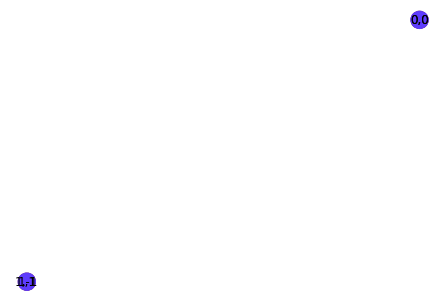

In [207]:
# test NO-instance
sigma2_instance = sigma2(['x'], ['y'], "x and y")
m_omega_vcs_instance = m_omega_vertex_cost_of_stability.build_instance_from_reduction(sigma2_instance)
test_instance_method(m_omega_vcs_instance.is_satisfiable(), False, "if a NO-instance is not satisfiable")

# test NO-instance
sigma2_instance = sigma2(['x'], ['y', 'z'], "x and not(y) and y and z")
m_omega_vcs_instance = m_omega_vertex_cost_of_stability.build_instance_from_reduction(sigma2_instance)
test_instance_method(m_omega_vcs_instance.is_satisfiable(), False, "if a NO-instance is not satisfiable, after the constructed graph was empty")

# test YES-instance
sigma2_instance = sigma2(['x'], ['y'], "x or y")
m_omega_vcs_instance = m_omega_vertex_cost_of_stability.build_instance_from_reduction(sigma2_instance)
test_instance_method(m_omega_vcs_instance.is_satisfiable(), True, "if a YES-instance is satisfiable")


## Generation of truth tables for LaTeX:

The following snippet of code will generate a LaTeX table containing all possible assignments for a given boolean formula.

In [208]:
# generation of truth tables for LaTeX:
boolean_formulas = ['(x and not(x)) or (y and z)']
truth_variables = ['x', 'y', 'z']
table = ttg.Truths(truth_variables, boolean_formulas, True, True)
print(table.as_tabulate(index=False, table_format='latex'))

\begin{tabular}{cccc}
\hline
  x  &  y  &  z  &  (x and not(x)) or (y and z)  \\
\hline
  0  &  0  &  0  &               0               \\
  0  &  0  &  1  &               0               \\
  0  &  1  &  0  &               0               \\
  0  &  1  &  1  &               1               \\
  1  &  0  &  0  &               0               \\
  1  &  0  &  1  &               0               \\
  1  &  1  &  0  &               0               \\
  1  &  1  &  1  &               1               \\
\hline
\end{tabular}
